Exercise 1: Data Exploration
Basic Statistics:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

Correlations with Price:
medv       1.000000
rm         0.695360
zn         0.360445
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


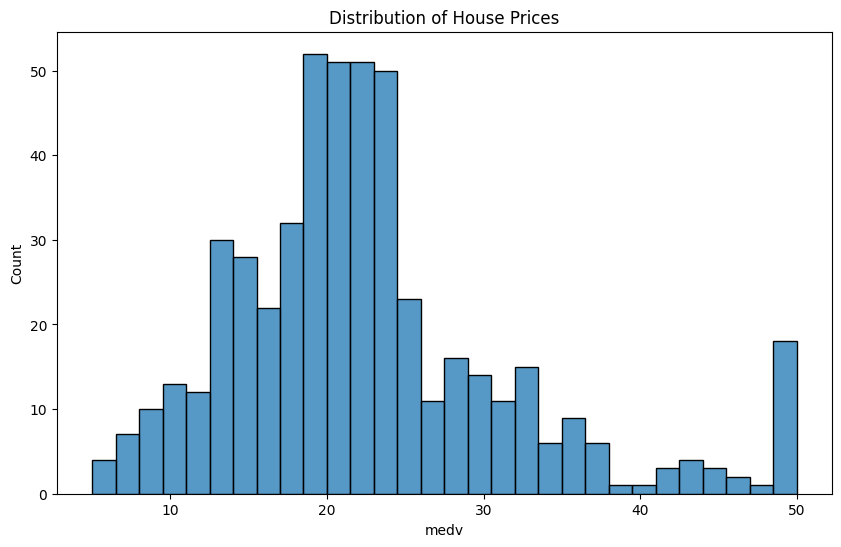


Exercise 2: Simple Linear Regression


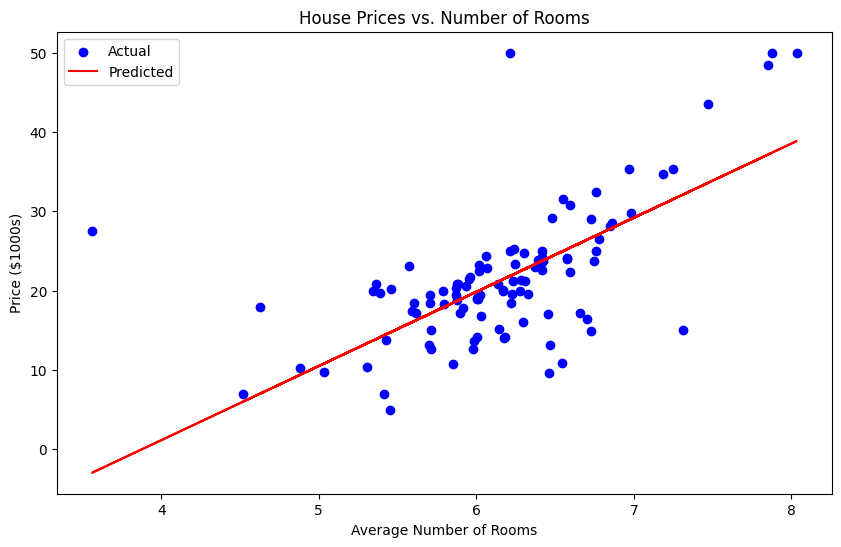

R² Score: 0.371
Mean Squared Error: 46.145

Exercise 3: Multiple Linear Regression
rm: 4.933
lstat: -0.567
ptratio: -0.867

R² Score: 0.630
Mean Squared Error: 27.115


In [1]:
import pandas as pd
import numpy as np
from ISLP import load_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def load_and_prepare_data():
    """Load Boston dataset and convert to pandas DataFrame with lowercase column names"""
    boston = load_data('Boston')
    data = boston.rename(columns=str.lower)
    return data

# Exercise 1: Basic Data Exploration
def exercise_1(data):
    """Explore basic statistics and relationships in the data"""
    # Basic statistics
    print("Basic Statistics:")
    print(data['medv'].describe())
    
    # Correlation with price
    correlations = data.corr()['medv'].sort_values(ascending=False)
    print("\nCorrelations with Price:")
    print(correlations)
    
    # Visualize distribution of prices
    plt.figure(figsize=(10, 6))
    sns.histplot(data['medv'], bins=30)
    plt.title('Distribution of House Prices')
    plt.show()

# Exercise 2: Simple Linear Regression
def exercise_2(data):
    """Implement simple linear regression with one feature"""
    # Use rm (number of rooms) as our feature
    X = data['rm'].values.reshape(-1, 1)
    y = data['medv'].values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price ($1000s)')
    plt.title('House Prices vs. Number of Rooms')
    plt.legend()
    plt.show()
    
    # Print metrics
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

# Exercise 3: Multiple Linear Regression
def exercise_3(data):
    """Implement multiple linear regression with selected features"""
    # Select features
    features = ['rm', 'lstat', 'ptratio']
    X = data[features]
    y = data['medv']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Print coefficients
    for feature, coef in zip(features, model.coef_):
        print(f"{feature}: {coef:.3f}")
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    print(f"\nR² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.3f}")

# Main execution
if __name__ == "__main__":
    data = load_and_prepare_data()
    
    print("Exercise 1: Data Exploration")
    exercise_1(data)
    
    print("\nExercise 2: Simple Linear Regression")
    exercise_2(data)
    
    print("\nExercise 3: Multiple Linear Regression")
    exercise_3(data)